# Tutorial

Here we reproduce the LAN tutorial from official website: https://hddm.readthedocs.io/en/latest/lan_tutorial.html#tutorial


Please check the website for details instructions

Thanks to [zenkavi (Zeynep Enkavi)](https://github.com/zenkavi), her repo **intro_HDDM**, which provides the `LAN_Tutorial.ipynb` that we have incorporated it into our project.

Thanks to [Epool (Wanke Pan)](https://github.com/Asynchro-Epool) for conducting thorough testing on the file.


In [1]:
# warning settings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data management
import pandas as pd
import numpy as np
import pickle

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Stats functionality
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
import hddm
from hddm.simulators.hddm_dataset_generators import simulator_h_c
import kabuki
print("The current version of kabuki is: ", kabuki.__version__)
print("The current version of HDDM is: ", hddm.__version__)

The current version of kabuki is:  0.6.5RC3
The current version of HDDM is:  0.9.8RC


## Section 1: Model Info / Simulation / Basic Plotting

### 1.1 Access Meta-Data

In [3]:
# List the models currently available
hddm.model_config.model_config.keys()

dict_keys(['ddm_hddm_base', 'full_ddm_hddm_base', 'ddm', 'angle', 'weibull_cdf', 'levy', 'full_ddm', 'ornstein', 'ddm_sdv', 'gamma_drift', 'gamma_drift_angle', 'ds_conflict_drift', 'ds_conflict_drift_angle', 'ddm_par2', 'ddm_par2_no_bias', 'ddm_par2_angle_no_bias', 'ddm_par2_weibull_no_bias', 'ddm_seq2', 'ddm_seq2_no_bias', 'ddm_seq2_angle_no_bias', 'ddm_seq2_weibull_no_bias', 'ddm_mic2_adj', 'ddm_mic2_adj_no_bias', 'ddm_mic2_adj_angle_no_bias', 'ddm_mic2_adj_weibull_no_bias', 'tradeoff_no_bias', 'tradeoff_angle_no_bias', 'tradeoff_weibull_no_bias', 'tradeoff_conflict_gamma_no_bias', 'race_no_bias_3', 'race_no_bias_angle_3', 'race_no_bias_4', 'race_no_bias_angle_4', 'lca_no_bias_3', 'lca_no_bias_angle_3', 'lca_no_bias_4', 'lca_no_bias_angle_4', 'full_ddm2'])

#### NOTE

You find two kinds of extra models which were not mentioned in the model listing above:

    Experimental models, which eventually will be fully documented (or dropped)

    vanilla models are used predominantly with the basic HDDM() classes. These models are not to be used with the HDDMnn() classes.

#### Now taking a closer look at the angle model

In [4]:
# Metadata
model = 'angle'
n_samples = 1000

In [5]:
# Config for our current model
hddm.model_config.model_config[model]

{'doc': 'Model formulation is described in the documentation under LAN Extension.\nMeant for use with the extension.',
 'params': ['v', 'a', 'z', 't', 'theta'],
 'params_trans': [0, 0, 1, 0, 0],
 'params_std_upper': [1.5, 1.0, None, 1.0, 1.0],
 'param_bounds': [[-3.0, 0.3, 0.1, 0.001, -0.1], [3.0, 3.0, 0.9, 2.0, 1.3]],
 'boundary': <function ssms.basic_simulators.boundary_functions.angle(t=1, theta=1)>,
 'params_default': [0.0, 1.0, 0.5, 0.001, 0.1],
 'hddm_include': ['v', 'a', 't', 'z', 'theta'],
 'choices': [-1, 1],
 'slice_widths': {'v': 1.5,
  'v_std': 1,
  'a': 1,
  'a_std': 1,
  'z': 0.1,
  'z_trans': 0.2,
  't': 0.01,
  't_std': 0.15,
  'theta': 0.1,
  'theta_std': 0.2}}

In [6]:
# Looking at the doc string before using the model
print(hddm.model_config.model_config[model]['doc'])

Model formulation is described in the documentation under LAN Extension.
Meant for use with the extension.


### 1.2 Generate Data

In [7]:
data, full_parameter_dict = simulator_h_c(n_subjects = 1,
                                          n_trials_per_subject = n_samples,
                                          model = model,
                                          p_outlier = 0.00,
                                          conditions = None,
                                          depends_on = None,
                                          regression_models = None,
                                          regression_covariates = None,
                                          group_only_regressors = False,
                                          group_only = None,
                                          fixed_at_default = ['v', 'a', 'z', 't', 'theta'])

In [8]:
data

,rt,response,subj_idx,v,a,z,t,theta
0,1.798028,0.0,0,0.0,1.0,0.5,0.001,0.1
1,0.284000,0.0,0,0.0,1.0,0.5,0.001,0.1
2,0.688995,1.0,0,0.0,1.0,0.5,0.001,0.1
3,2.138027,0.0,0,0.0,1.0,0.5,0.001,0.1
4,2.491002,1.0,0,0.0,1.0,0.5,0.001,0.1
...,...,...,...,...,...,...,...,...
995,1.075994,1.0,0,0.0,1.0,0.5,0.001,0.1
996,0.320999,0.0,0,0.0,1.0,0.5,0.001,0.1
997,0.617996,1.0,0,0.0,1.0,0.5,0.001,0.1
998,0.632995,0.0,0,0.0,1.0,0.5,0.001,0.1


In [9]:
full_parameter_dict

{'v': 0.0, 'a': 1.0, 'z': 0.5, 't': 0.001, 'theta': 0.1}

### 1.2 First Plot

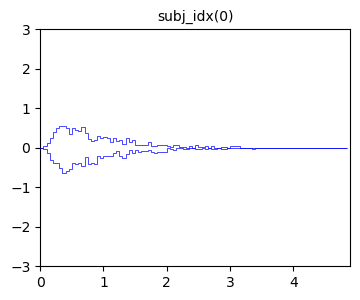

In [10]:
# help(hddm.plotting.plot_from_data)
# help(hddm.plotting._plot_func_model)
hddm.plotting.plot_from_data(df = data,
                             generative_model = model,
                             columns = 1,
                             groupby = ['subj_idx'],
                             figsize = (4, 3),
                             value_range = np.arange(0, 5, 0.1),
                             plot_func = hddm.plotting._plot_func_model,
                             hist_bottom = 0, # this makes the histograms start from 0. Otherwise https://github.com/hddm-devs/hddm/blob/master/hddm/plotting.py#L1080 makes them start from 2
                             **{'alpha': 1.,
                                'ylim': 3,
                                'add_data_rts': True,
                                'add_data_model': False})
plt.show()

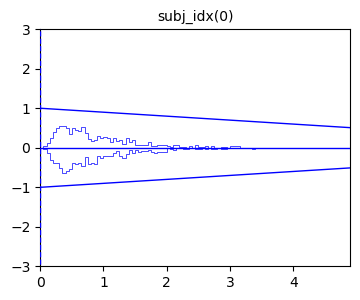

In [11]:
hddm.plotting.plot_from_data(df = data,
                             generative_model = model,
                             columns = 1,
                             groupby = ['subj_idx'],
                             figsize = (4, 3),
                             value_range = np.arange(0, 5, 0.1),
                             plot_func = hddm.plotting._plot_func_model,
                             hist_bottom = 0,
                             **{'alpha': 1.,
                                'ylim': 3,
                                'add_data_rts': True,
                                'add_data_model': True})
plt.show()

## Section 2: Single Subject (or collapsed) Data

In [12]:
# Metadata
nmcmc = 1500
model = 'angle'
n_samples = 1000
includes = hddm.model_config.model_config[model]['hddm_include']

In [13]:
data, full_parameter_dict = simulator_h_c(n_subjects = 1,
                                          n_trials_per_subject = n_samples,
                                          model = model,
                                          p_outlier = 0.00,
                                          conditions = None,
                                          depends_on = None,
                                          regression_models = None,
                                          regression_covariates = None, # need this to make initial covariate matrix from which to use dmatrix (patsy)
                                          group_only_regressors = False,
                                          group_only = None,
                                          fixed_at_default = None)

In [14]:
data

,rt,response,subj_idx,v,a,z,t,theta
0,1.831458,1.0,0,0.546562,1.54248,0.466771,0.878466,0.613071
1,2.095467,1.0,0,0.546562,1.54248,0.466771,0.878466,0.613071
2,1.777458,1.0,0,0.546562,1.54248,0.466771,0.878466,0.613071
3,1.636460,0.0,0,0.546562,1.54248,0.466771,0.878466,0.613071
4,1.146467,1.0,0,0.546562,1.54248,0.466771,0.878466,0.613071
...,...,...,...,...,...,...,...,...
995,1.826458,1.0,0,0.546562,1.54248,0.466771,0.878466,0.613071
996,2.434483,1.0,0,0.546562,1.54248,0.466771,0.878466,0.613071
997,2.094467,1.0,0,0.546562,1.54248,0.466771,0.878466,0.613071
998,1.943460,0.0,0,0.546562,1.54248,0.466771,0.878466,0.613071


In [15]:
# Define the HDDM model
hddmnn_model = hddm.HDDMnn(data,
                           informative = False,
                           include = includes,
                           p_outlier = 0.01,
                           w_outlier = 0.1,
                           model = model,)

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


**Note: If yhddmnn_modelour cpu run low on computing, the following code may take more time**

In [16]:
%%time
# Sample
hddmnn_model.sample(
    nmcmc,burn = 500,
    dbname='hddm_single.db', db='pickle'
) 
hddmnn_model.save('hddm_single')

 [-----------------100%-----------------] 1500 of 1500 complete in 68.9 sechddm sampling elpased time:  68.944 s
CPU times: user 7min 19s, sys: 1.05 s, total: 7min 20s
Wall time: 1min 8s


### 2.1 Visualization

tracename: 
v
tracename: 
a
tracename: 
z
tracename: 
t
tracename: 
theta


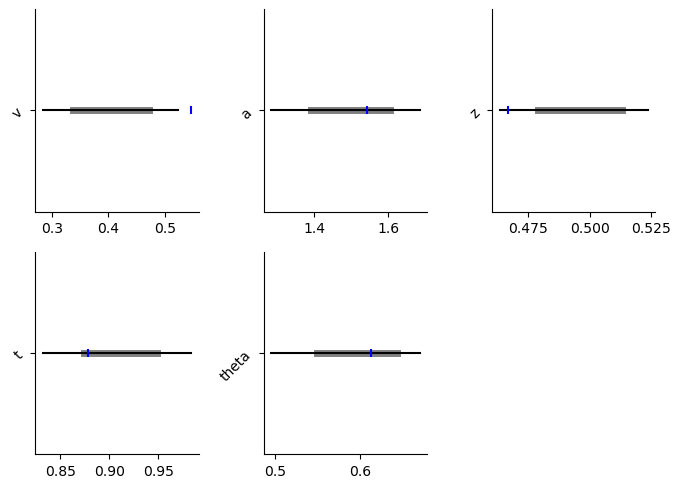

In [17]:
# Caterpillar Plot: (Parameters recovered ok?)
# help(hddm.plotting.plot_caterpillar)# 
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = full_parameter_dict,
                               figsize = (8, 5),
                               columns = 3)

plt.show()

#### 2.1.1 Posterior Predictive (via `model cartoon plot`)

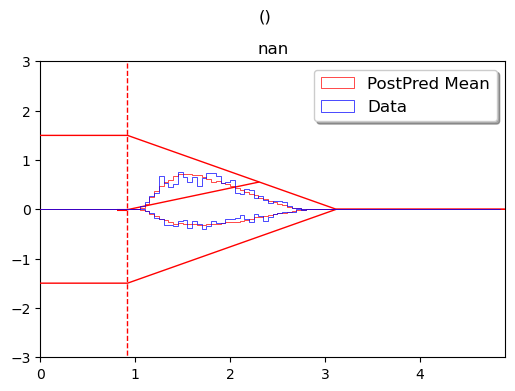

In [18]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_model,
                                        columns = 1,
                                        groupby = ['subj_idx'],
                                        figsize = (6, 4),
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        hist_bottom = 0,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'samples': 200})
plt.show()

**A small note on convergence:**

Plotting v
Plotting a
Plotting z
Plotting t
Plotting theta


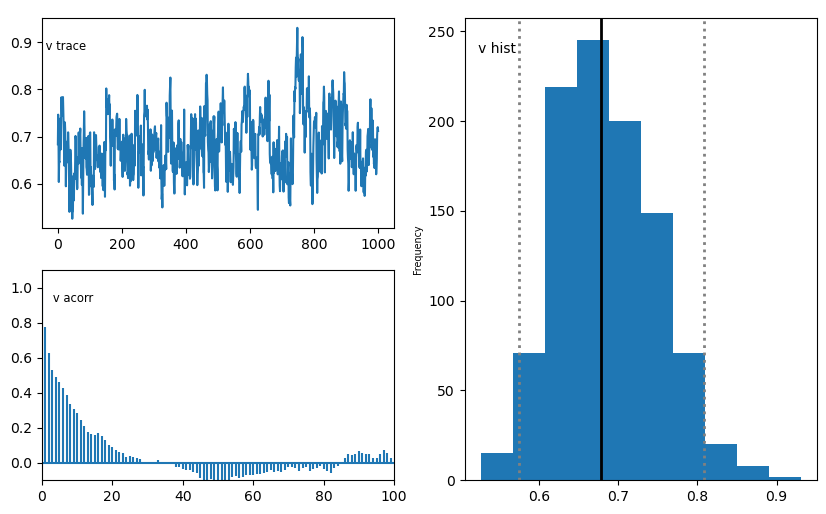

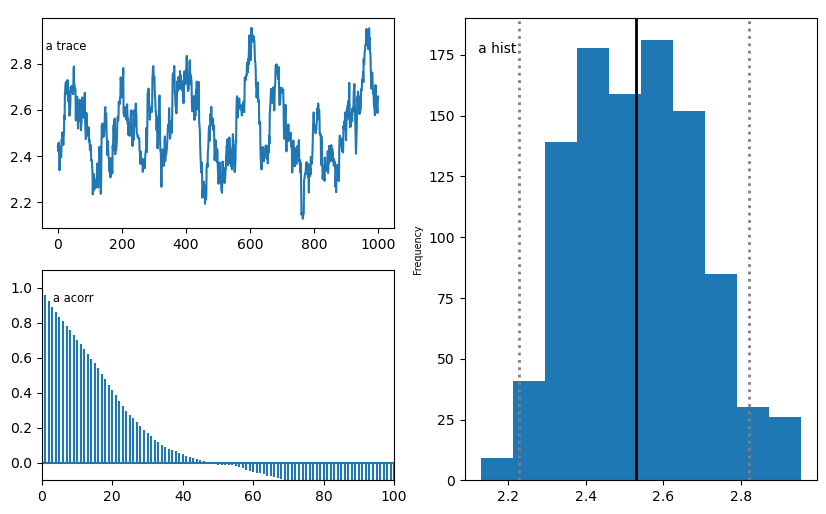

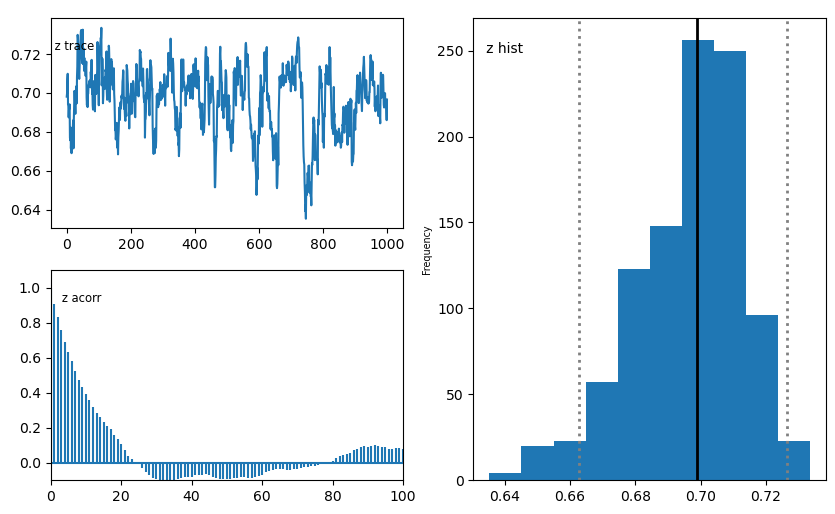

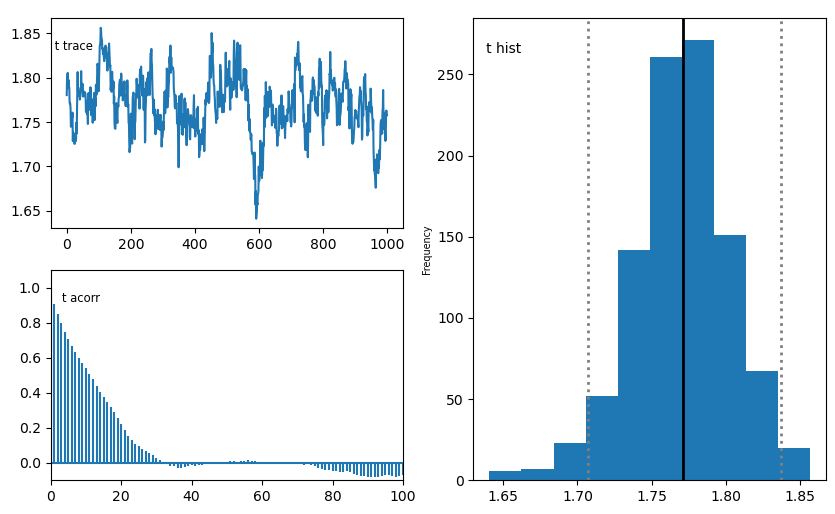

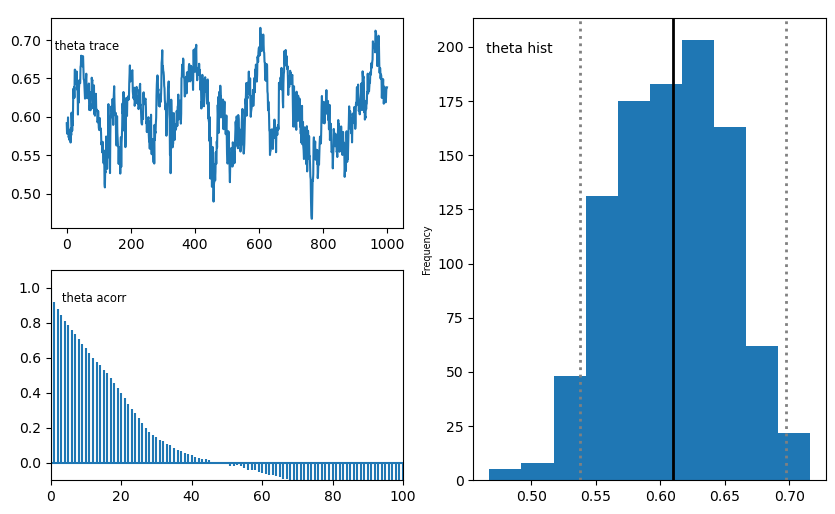

In [10]:
# TAKING A LOOK AT THE POSTERIOR TRACES
hddmnn_model.plot_posteriors(hddm.simulators.model_config[model]['params'])
plt.show()

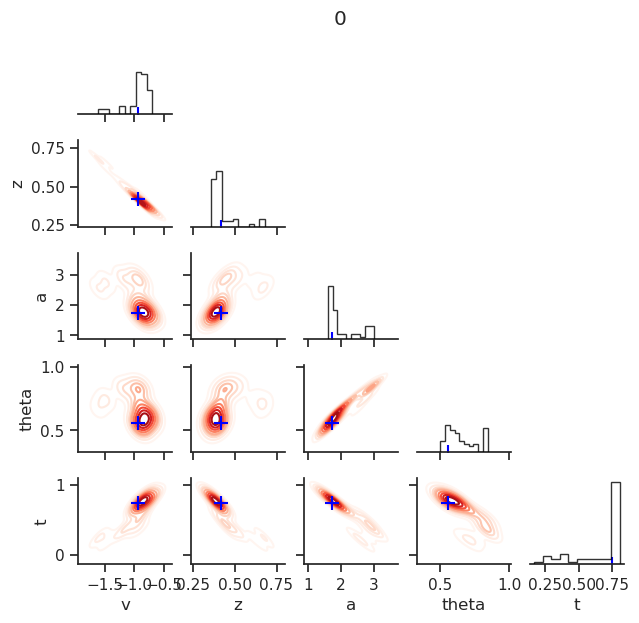

In [8]:
hddm.plotting.plot_posterior_pair(hddmnn_model, save = False,
                                  parameter_recovery_mode = True,
                                  samples = 500,
                                  figsize = (6, 6))

## Section 3: Hierarchical Models

In [24]:
# Metadata
nmcmc = 1000
model = 'angle'
n_trials_per_subject = 200
n_subjects = 10

In [25]:
# test regressors only False
# add p_outliers to the generator !
data, full_parameter_dict = simulator_h_c(data = None,
                                          n_subjects = n_subjects,
                                          n_trials_per_subject = n_trials_per_subject,
                                          model = model,
                                          p_outlier = 0.00,
                                          conditions = None,
                                          depends_on = None,
                                          regression_models = None,
                                          regression_covariates = None,
                                          group_only_regressors = False,
                                          group_only = None,
                                          fixed_at_default = None)

In [26]:
hddmnn_model = hddm.HDDMnn(data,
                           model = model,
                           informative = False,
                           is_group_model = True,
                           include = hddm.simulators.model_config[model]['hddm_include'],
                           p_outlier = 0.0)

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


**Note: If yhddmnn_modelour cpu run low on computing, the following code may take more than 30 minutes**

In [27]:
%%time
hddmnn_model.sample(
    nmcmc,burn = 100,
    dbname='hddm_hier.db', db='pickle'
) 
hddmnn_model.save('hddm_hier')
# if you want to save the model specify extra arguments --> dbname='traces.db', db='pickle'. # hddmnn_model.save('test_model')

 [-----------------100%-----------------] 1001 of 1000 complete in 1816.0 sechddm sampling elpased time:  1816.01 s
CPU times: user 2h 32min 3s, sys: 21min 7s, total: 2h 53min 11s
Wall time: 30min 16s


tracename: 
v
tracename: 
v_subj.0
tracename: 
v_subj.1
tracename: 
v_subj.2
tracename: 
v_subj.3
tracename: 
v_subj.4
tracename: 
v_subj.5
tracename: 
v_subj.6
tracename: 
v_subj.7
tracename: 
v_subj.8
tracename: 
v_subj.9
tracename: 
a
tracename: 
a_subj.0
tracename: 
a_subj.1
tracename: 
a_subj.2
tracename: 
a_subj.3
tracename: 
a_subj.4
tracename: 
a_subj.5
tracename: 
a_subj.6
tracename: 
a_subj.7
tracename: 
a_subj.8
tracename: 
a_subj.9
tracename: 
z
tracename: 
z_subj.0
tracename: 
z_subj.1
tracename: 
z_subj.2
tracename: 
z_subj.3
tracename: 
z_subj.4
tracename: 
z_subj.5
tracename: 
z_subj.6
tracename: 
z_subj.7
tracename: 
z_subj.8
tracename: 
z_subj.9
tracename: 
t
tracename: 
t_subj.0
tracename: 
t_subj.1
tracename: 
t_subj.2
tracename: 
t_subj.3
tracename: 
t_subj.4
tracename: 
t_subj.5
tracename: 
t_subj.6
tracename: 
t_subj.7
tracename: 
t_subj.8
tracename: 
t_subj.9
tracename: 
theta
tracename: 
theta_subj.0
tracename: 
theta_subj.1
tracename: 
theta_subj.2
tracename: 

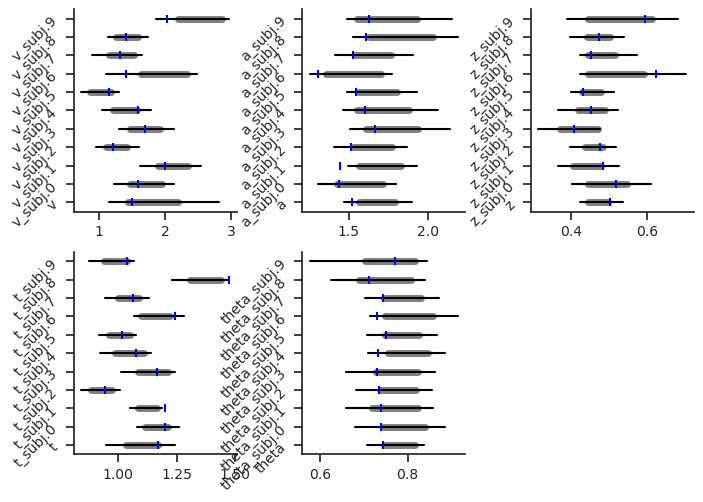

In [28]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = full_parameter_dict,
                               figsize = (8, 5),
                               columns = 3)

plt.show()

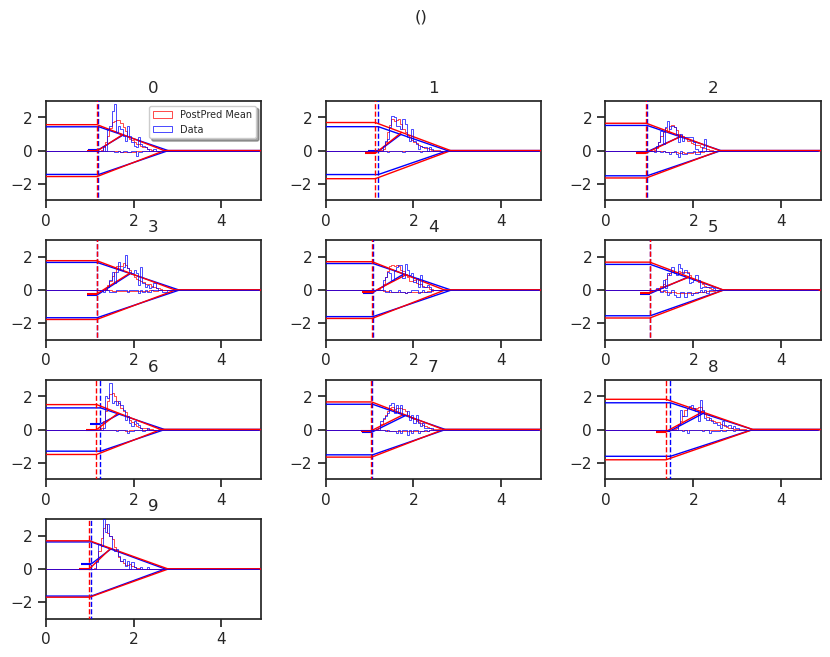

In [29]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_model,
                                        columns = 3,
                                        figsize = (10, 7),
                                        groupby = ['subj_idx'],
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = True,
                                        hist_bottom = 0,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'add_posterior_mean_rts': True,
                                        'add_posterior_mean_model': True,
                                        'add_posterior_uncertainty_rts': False,
                                        'add_posterior_uncertainty_model': False,
                                        'samples': 200,
                                        'legend_fontsize': 7.})

## Section 4: Parameter varies by Condition

In [3]:
# Metadata
nmcmc = 1000
model = 'angle'
n_trials_per_subject = 500

# We allow the boundary conditions to vary
depends_on = {'a': ['c_one']}

# They will depend on a fictious column 'c_one' that specifies
# levels / conditions
conditions = {'c_one': ['low', 'medium', 'high']}

In [4]:
data, full_parameter_dict = simulator_h_c(n_subjects = 1,
                                          n_trials_per_subject = n_trials_per_subject,
                                          model = model,
                                          p_outlier = 0.00,
                                          conditions = conditions,
                                          depends_on = depends_on,
                                          regression_models = None,
                                          regression_covariates = None,
                                          group_only_regressors = False,
                                          group_only = None,
                                          fixed_at_default = None)

In [5]:
# Let's check the resulting parameter vector
full_parameter_dict

{'theta': 0.38108604548415503,
 't': 0.7731159828429451,
 'v': 1.7345240018966341,
 'z': 0.5186526418056586,
 'a(high)': 1.7608052183352296,
 'a(low)': 1.604133051213868,
 'a(medium)': 1.029351622105016}

In [6]:
# Make HDDM Model
hddmnn_model = hddm.HDDMnn(data,
                           model = model,
                           informative = False,
                           include = hddm.simulators.model_config[model]['hddm_include'],
                           p_outlier = 0.0,
                           is_group_model = False,
                           depends_on = depends_on)


Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


**Note: If yhddmnn_modelour cpu run low on computing, the following code may take more than 10 minutes**

In [7]:
%%time
# Sample
hddmnn_model.sample(
    nmcmc,burn = 100,
    dbname='hddm_by_con.db', db='pickle'
) 
hddmnn_model.save('hddm_by_con')

 [-----------------100%-----------------] 1000 of 1000 complete in 623.2 sechddm sampling elpased time:  623.207 s
CPU times: user 55min 22s, sys: 2min 41s, total: 58min 3s
Wall time: 10min 23s


tracename: 
v
tracename: 
a(high)
tracename: 
a(low)
tracename: 
a(medium)
tracename: 
z
tracename: 
t
tracename: 
theta


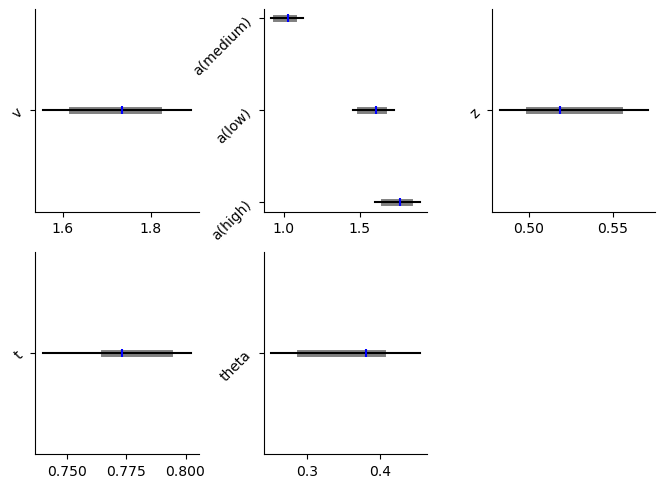

In [8]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = full_parameter_dict,
                               figsize = (8, 5),
                               columns = 3)

plt.show()

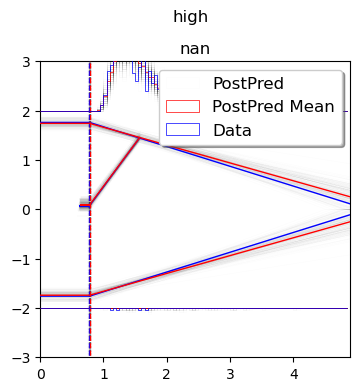

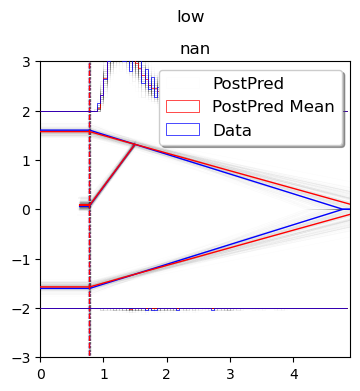

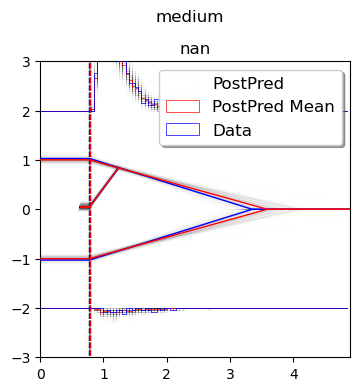

In [9]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_model,
                                        columns = 1,
                                        groupby = ['subj_idx'],
                                        figsize = (4, 4),
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = True,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'add_posterior_uncertainty_rts': True,
                                        'add_posterior_uncertainty_model': True,
                                        'samples': 200})
plt.show()

### 4.1 Combine hierarchical and condition data

In [10]:
# Metadata
nmcmc = 1500
model = 'angle'
n_subjects = 5
n_trials_per_subject = 500

In [11]:
data, full_parameter_dict = simulator_h_c(n_subjects = n_subjects,
                                          n_trials_per_subject = n_trials_per_subject,
                                          model = model,
                                          p_outlier = 0.00,
                                          conditions = {'c_one': ['low', 'medium', 'high']}, #, 'c_three': ['low', 'medium', 'high']},
                                          depends_on = {'v': ['c_one']}, # 'theta': ['c_two']}, # 'theta': ['c_two']}, #regression_models = None, #
                                          regression_models = None, #regression_covariates = None,
                                          regression_covariates = None, # need this to make initial covariate matrix from which to use dmatrix (patsy)
                                          group_only_regressors = False,
                                          group_only = None,
                                          fixed_at_default = None)

In [12]:
# Make HDDM Model
hddmnn_model = hddm.HDDMnn(data,
                           model = model,
                           informative = False,
                           include = hddm.simulators.model_config[model]['hddm_include'],
                           p_outlier = 0.0,
                           is_group_model = True,
                           depends_on = {'v': 'c_one'})

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


**Note: If yhddmnn_modelour cpu run low on computing, the following code may take more than 1 hour**

In [13]:
%%time
#Sample
hddmnn_model.sample(
    nmcmc,burn = 100,
    dbname='hddm_hier_by_con.db', db='pickle'
) 
hddmnn_model.save('hddm_hier_by_con')

 [-----------------100%-----------------] 1501 of 1500 complete in 5472.9 sechddm sampling elpased time:  5472.975 s
CPU times: user 8h 9min 1s, sys: 22min 49s, total: 8h 31min 50s
Wall time: 1h 31min 13s


tracename: 
v(high)
tracename: 
v(low)
tracename: 
v(medium)
tracename: 
v_subj(high).0
tracename: 
v_subj(high).1
tracename: 
v_subj(high).2
tracename: 
v_subj(high).3
tracename: 
v_subj(high).4
tracename: 
v_subj(low).0
tracename: 
v_subj(low).1
tracename: 
v_subj(low).2
tracename: 
v_subj(low).3
tracename: 
v_subj(low).4
tracename: 
v_subj(medium).0
tracename: 
v_subj(medium).1
tracename: 
v_subj(medium).2
tracename: 
v_subj(medium).3
tracename: 
v_subj(medium).4
tracename: 
a
tracename: 
a_subj.0
tracename: 
a_subj.1
tracename: 
a_subj.2
tracename: 
a_subj.3
tracename: 
a_subj.4
tracename: 
z
tracename: 
z_subj.0
tracename: 
z_subj.1
tracename: 
z_subj.2
tracename: 
z_subj.3
tracename: 
z_subj.4
tracename: 
t
tracename: 
t_subj.0
tracename: 
t_subj.1
tracename: 
t_subj.2
tracename: 
t_subj.3
tracename: 
t_subj.4
tracename: 
theta
tracename: 
theta_subj.0
tracename: 
theta_subj.1
tracename: 
theta_subj.2
tracename: 
theta_subj.3
tracename: 
theta_subj.4


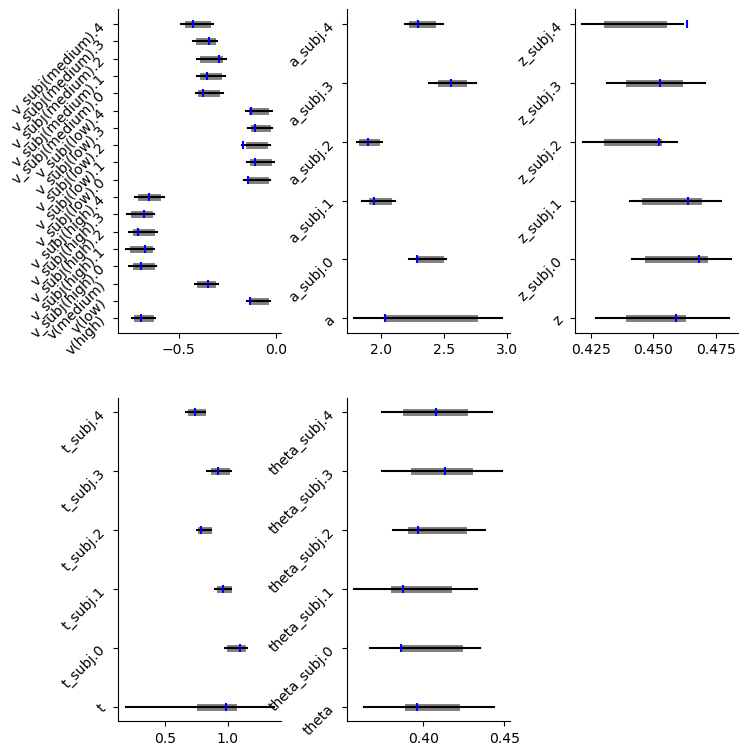

In [14]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = full_parameter_dict,
                               figsize = (8, 8),
                               columns = 3)

plt.show()

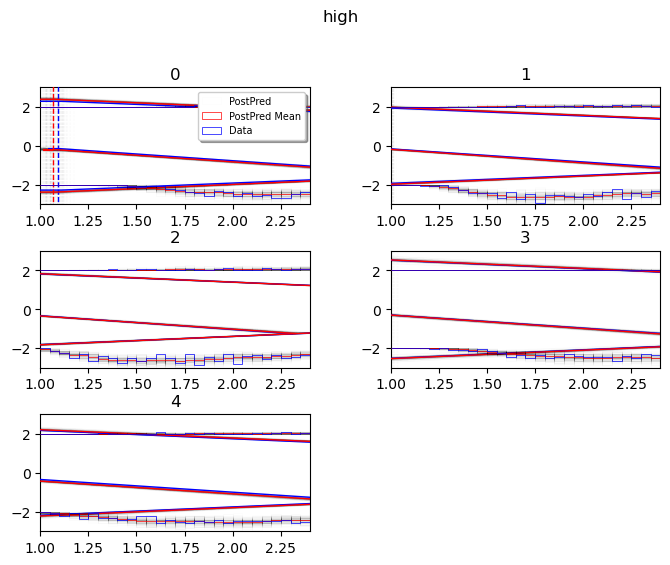

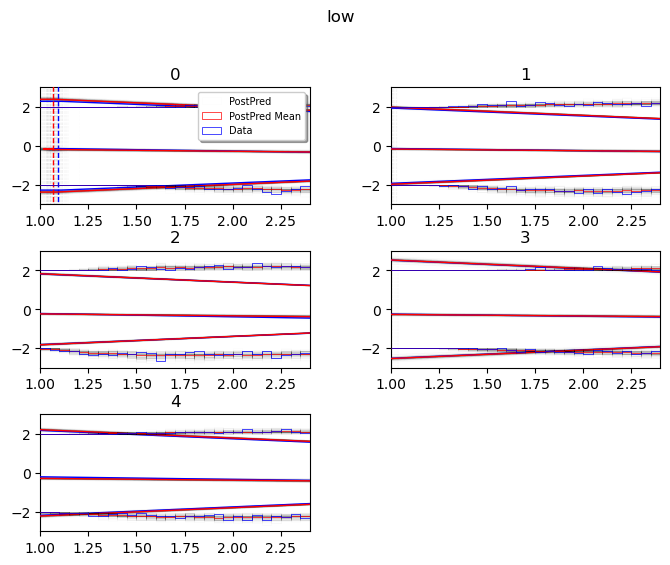

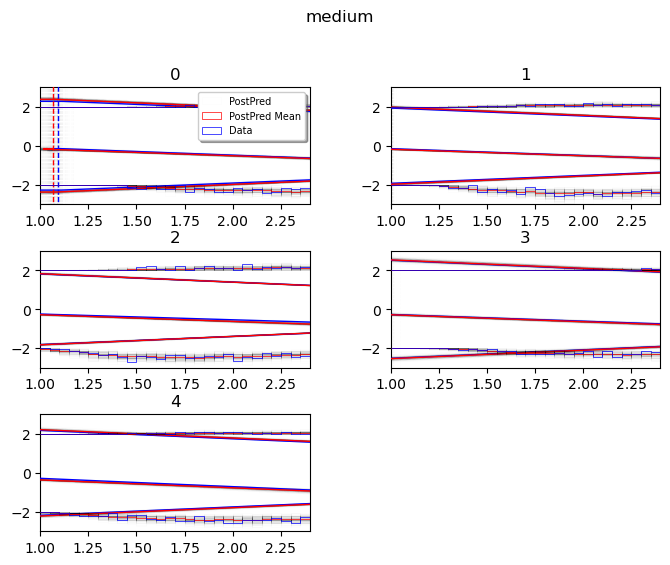

In [15]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_model,
                                        columns = 2, # groupby = ['subj_idx'],
                                        figsize = (8, 6),
                                        value_range = np.arange(1, 2.5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = True,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'add_posterior_uncertainty_rts': True,
                                        'add_posterior_uncertainty_model': True,
                                        'samples': 200,
                                        'legend_fontsize': 7})
plt.show()

## Section 5: Regressors
This section provides a simple working example using the Neural Networks with the Regression backend. The regression back-end allows linking parameters to trial-by-trial covariates via a (general) linear model.

In [22]:
# Metadata
nmcmc = 200
model = 'angle'
n_samples_by_subject = 500

In [23]:
data, full_parameter_dict = simulator_h_c(n_subjects = 5,
                                          n_samples_by_subject = n_samples_by_subject,
                                          model = model,
                                          p_outlier = 0.00,
                                          conditions = None,
                                          depends_on = None,
                                          regression_models = ['t ~ 1 + covariate_name', 'v ~ 1 + covariate_name'],
                                          regression_covariates = {'covariate_name': {'type': 'continuous', 'range': (0, 1)}},
                                          group_only_regressors = False,
                                          group_only = None,
                                          fixed_at_default = None)

In [24]:
# Set up the regressor a regressor:
reg_model_v = {'model': 'v ~ 1 + covariate_name', 'link_func': lambda x: x}
reg_model_t = {'model': 't ~ 1 + covariate_name', 'link_func': lambda x: x}
reg_descr = [reg_model_t, reg_model_v]


In [25]:
# Make HDDM model
hddmnn_reg = hddm.HDDMnnRegressor(data,
                                  reg_descr,
                                  include = hddm.simulators.model_config[model]['hddm_include'],
                                  model = model,
                                  informative = False,
                                  p_outlier = 0.0)

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


**Note: If yhddmnn_modelour cpu run low on computing, the following code may take more time**

In [26]:
%%time
# Sample
hddmnn_reg.sample(
    nmcmc,burn = 100,
    dbname='hddm_reg.db', db='pickle'
) 
hddmnn_reg.save('hddm_reg')

 [                  1%                  ] 2 of 200 complete in 1.1 sec

<string>:11: UserWarning: Boundary violation of regressor part.


 [-----------      30%                  ] 60 of 200 complete in 28.9 sec

<string>:11: UserWarning: Boundary violation of regressor part.
<string>:11: UserWarning: Boundary violation of regressor part.


 [-----------      31%                  ] 62 of 200 complete in 29.9 sec

<string>:11: UserWarning: Boundary violation of regressor part.


 [-----------------97%----------------  ] 194 of 200 complete in 92.0 sec

<string>:11: UserWarning: Boundary violation of regressor part.


 [-----------------100%-----------------] 200 of 200 complete in 95.4 sechddm sampling elpased time:  95.462 s
CPU times: user 12min 35s, sys: 7.87 s, total: 12min 43s
Wall time: 1min 35s


tracename: 
v_Intercept
tracename: 
v_Intercept_subj.0
tracename: 
v_Intercept_subj.1
tracename: 
v_Intercept_subj.2
tracename: 
v_Intercept_subj.3
tracename: 
v_Intercept_subj.4
tracename: 
v_covariate_name
tracename: 
a
tracename: 
a_subj.0
tracename: 
a_subj.1
tracename: 
a_subj.2
tracename: 
a_subj.3
tracename: 
a_subj.4
tracename: 
z
tracename: 
z_subj.0
tracename: 
z_subj.1
tracename: 
z_subj.2
tracename: 
z_subj.3
tracename: 
z_subj.4
tracename: 
t_Intercept
tracename: 
t_Intercept_subj.0
tracename: 
t_Intercept_subj.1
tracename: 
t_Intercept_subj.2
tracename: 
t_Intercept_subj.3
tracename: 
t_Intercept_subj.4
tracename: 
t_covariate_name
tracename: 
theta
tracename: 
theta_subj.0
tracename: 
theta_subj.1
tracename: 
theta_subj.2
tracename: 
theta_subj.3
tracename: 
theta_subj.4


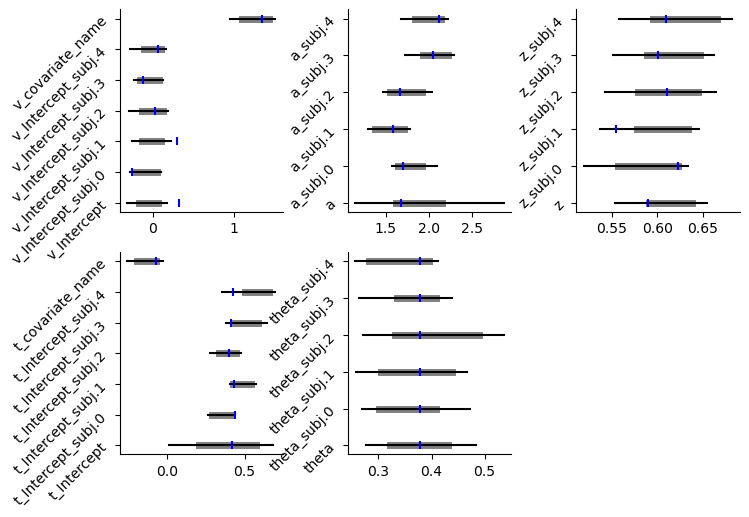

In [29]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_reg,
                               ground_truth_parameter_dict = full_parameter_dict,
                               figsize = (8, 5),
                               columns = 3)

plt.show()

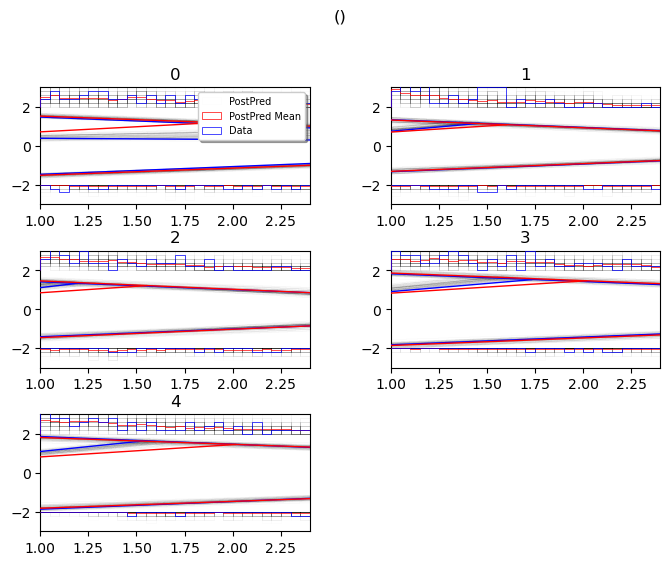

In [30]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_reg,
                                        columns = 2, # groupby = ['subj_idx'],
                                        figsize = (8, 6),
                                        value_range = np.arange(1, 2.5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = True,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'add_posterior_uncertainty_rts': True,
                                        'add_posterior_uncertainty_model': True,
                                        'samples': 200,
                                        'legend_fontsize': 7})
plt.show()

## Section 6: Stim Coding

In [31]:
# Metadata
nmcmc = 300
model = 'ddm'
n_samples_by_condition = 500
split_param = 'v'

In [32]:
sim_data_stimcoding, parameter_dict = hddm.simulators.simulator_stimcoding(model = model,
                                                                           split_by = split_param,
                                                                           drift_criterion = 0.3,
                                                                           n_trials_per_condition = 500)

In [33]:
sim_data_stimcoding

,rt,response,stim,v,a,z,t,subj_idx
0,2.165337,0,1,-2.104258,1.435856,0.311824,1.918336,none
1,2.142337,0,1,-2.104258,1.435856,0.311824,1.918336,none
2,2.563332,0,1,-2.104258,1.435856,0.311824,1.918336,none
3,2.374334,0,1,-2.104258,1.435856,0.311824,1.918336,none
4,2.403334,0,1,-2.104258,1.435856,0.311824,1.918336,none
...,...,...,...,...,...,...,...,...
995,3.006331,1,2,2.704258,1.435856,0.311824,1.918336,none
996,2.637331,1,2,2.704258,1.435856,0.311824,1.918336,none
997,2.307335,1,2,2.704258,1.435856,0.311824,1.918336,none
998,2.543332,1,2,2.704258,1.435856,0.311824,1.918336,none


In [34]:
parameter_dict

{'v': 2.404258229701055,
 'a': 1.435856486250827,
 'z': 0.31182436387435897,
 't': 1.918336377957057,
 'dc': 0.3}

In [36]:
hddmnn_model = hddm.HDDMnnStimCoding(sim_data_stimcoding,
                                     include = hddm.simulators.model_config[model]['hddm_include'],
                                     model = model,
                                     stim_col = 'stim',
                                     p_outlier = 0.0,
                                     split_param = split_param,
                                     informative = False,
                                     drift_criterion = True)

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


**Note: If yhddmnn_modelour cpu run low on computing, the following code may take more time**

In [37]:
%%time
# Sample
hddmnn_model.sample(
    nmcmc,burn = 100,
    dbname='hddm_stim_code.db', db='pickle'
) 
hddmnn_model.save('hddm_stim_code')

 [-----------------100%-----------------] 300 of 300 complete in 80.7 sechddm sampling elpased time:  80.73 s
CPU times: user 7min 30s, sys: 20.6 s, total: 7min 51s
Wall time: 1min 20s


In [38]:
hddmnn_model.gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
v,2.414144,0.067613,2.294394,2.36582,2.413298,2.462105,2.56481,0.006045
a,1.401548,0.046447,1.337725,1.3647,1.392831,1.429278,1.516546,0.00445
z,0.302584,0.010852,0.281513,0.29594,0.301584,0.309261,0.323868,0.000998
t,1.930902,0.010013,1.909015,1.924274,1.932349,1.938578,1.946339,0.000953
dc,0.269935,0.066695,0.158223,0.223327,0.277014,0.316157,0.398596,0.005898


tracename: 
v
tracename: 
a
tracename: 
z
tracename: 
t
tracename: 
dc


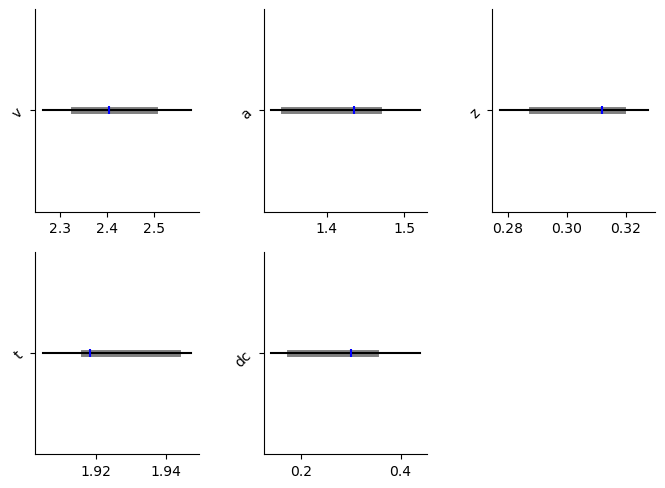

In [39]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = parameter_dict,
                               figsize = (8, 5),
                               columns = 3)

plt.show()

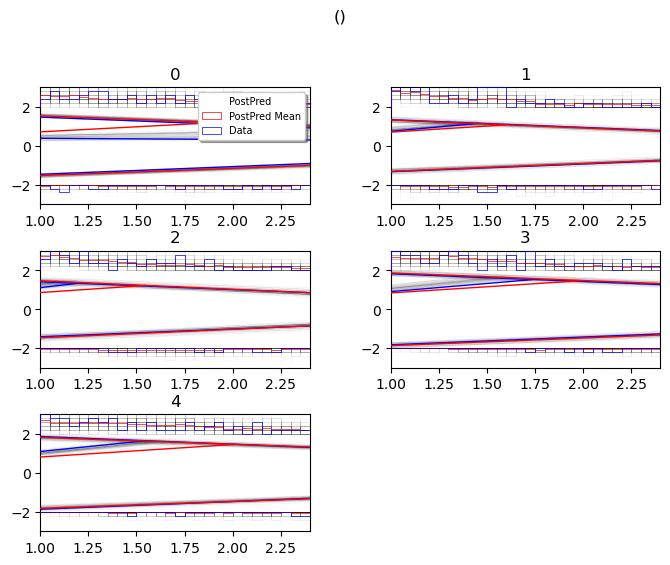

In [40]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_reg,
                                        columns = 2, # groupby = ['subj_idx'],
                                        figsize = (8, 6),
                                        value_range = np.arange(1, 2.5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = True,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'add_posterior_uncertainty_rts': True,
                                        'add_posterior_uncertainty_model': True,
                                        'samples': 200,
                                        'legend_fontsize': 7})
plt.show()

## Section 7: Model Recovery

In [5]:
# note: here we merge the version of hddm by zenkavi, which repair the bug of fitting the weibull model 
model = 'weibull_cdf'
n_samples = 300

In [6]:
# test regressors only False
# add p_outliers to the generator !
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(n_subjects = 1,
                                                                                  n_samples_by_subject = n_samples,
                                                                                  model = model,
                                                                                  p_outlier = 0.00,
                                                                                  conditions = None,
                                                                                  depends_on = None,
                                                                                  regression_models = None,
                                                                                  regression_covariates = None,
                                                                                  group_only_regressors = False,
                                                                                  group_only = None,
                                                                                  fixed_at_default = None)


In [7]:
data

,rt,response,subj_idx,v,a,z,t,alpha,beta
0,1.803362,1.0,0,1.841322,0.886432,0.616068,1.606362,3.264298,4.398982
1,2.027360,1.0,0,1.841322,0.886432,0.616068,1.606362,3.264298,4.398982
2,2.227358,1.0,0,1.841322,0.886432,0.616068,1.606362,3.264298,4.398982
3,2.092360,1.0,0,1.841322,0.886432,0.616068,1.606362,3.264298,4.398982
4,1.899362,1.0,0,1.841322,0.886432,0.616068,1.606362,3.264298,4.398982
...,...,...,...,...,...,...,...,...,...
95,1.697362,1.0,0,1.841322,0.886432,0.616068,1.606362,3.264298,4.398982
96,2.058360,1.0,0,1.841322,0.886432,0.616068,1.606362,3.264298,4.398982
97,1.700362,1.0,0,1.841322,0.886432,0.616068,1.606362,3.264298,4.398982
98,1.982361,1.0,0,1.841322,0.886432,0.616068,1.606362,3.264298,4.398982


In [15]:
# Now we fit for each model:
hddmnn_model_weibull = hddm.HDDMnn(data,
                                   informative = False,
                                   model = 'weibull_cdf',
                                   p_outlier = 0.0,
                                   include = hddm.simulators.model_config['weibull_cdf']['hddm_include'],
                                   is_group_model = False)

hddmnn_model_angle = hddm.HDDMnn(data,
                                 model = 'angle',
                                 informative = False,
                                 p_outlier = 0.0,
                                 include = hddm.simulators.model_config['angle']['hddm_include'],
                                 is_group_model = False)

hddmnn_model_ddm = hddm.HDDMnn(data,
                               informative = False,
                               model = 'ddm',
                               p_outlier = 0.0,
                               include = hddm.simulators.model_config['ddm']['hddm_include'],
                               is_group_model = False)

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10
Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10
Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


In [19]:
%%time
# Sample
nmcmc = 500
hddmnn_model_weibull.sample(
    nmcmc,
    burn = 200,
    dbname='hddm_weibull.db', db='pickle'
)
hddmnn_model_weibull.save('hddm_weibull')

hddmnn_model_angle.sample(
    nmcmc,
    burn = 200,
    dbname='hddm_angle.db', db='pickle'
)
hddmnn_model_angle.save('hddm_angle')

hddmnn_model_ddm.sample(
    nmcmc,
    burn = 200,
    dbname='hddm_ddm.db', db='pickle'
)
hddmnn_model_ddm.save('hddm_ddm')

 [-----------------100%-----------------] 500 of 500 complete in 20.2 sechddm sampling elpased time:  20.26 s
 [-----------------100%-----------------] 500 of 500 complete in 12.0 sechddm sampling elpased time:  12.003 s
 [-----------------100%-----------------] 500 of 500 complete in 6.4 sechddm sampling elpased time:  6.407 s
CPU times: user 5min 9s, sys: 143 ms, total: 5min 9s
Wall time: 38.7 s


### 7.1 Checking Model Fits Visually
Posterior Predictive: Do the ‘Posterior Models’ also make sense?

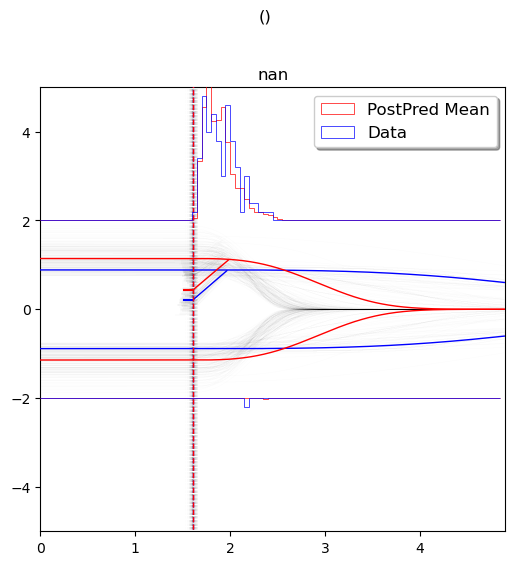

In [12]:
# WEIBULL
hddm.plotting.plot_posterior_predictive(model = hddmnn_model_weibull,
                                        columns = 1,
                                        groupby = ['subj_idx'],
                                        figsize = (6, 6),
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = True,
                                        **{'alpha': 0.01,
                                        'ylim': 5,
                                        'add_posterior_uncertainty_model': True,
                                        'add_posterior_uncertainty_rts': False,
                                        'add_posterior_mean_rts': True,
                                        'samples': 200})
plt.show()

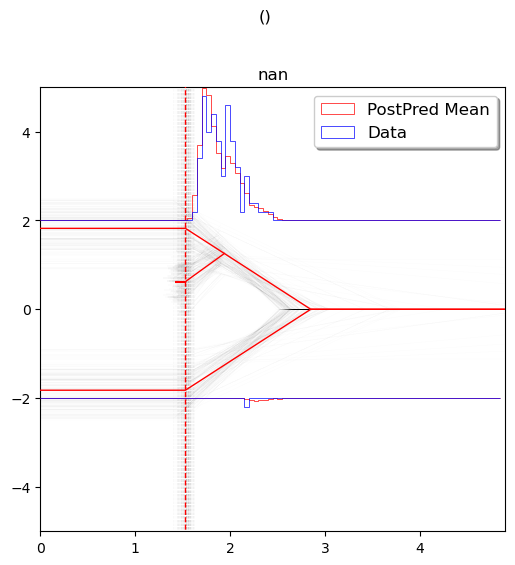

In [20]:
# ANGLE
hddm.plotting.plot_posterior_predictive(model = hddmnn_model_angle,
                                        columns = 1,
                                        groupby = ['subj_idx'],
                                        figsize = (6, 6),
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = False,
                                        **{'alpha': 0.01,
                                        'ylim': 5,
                                        'add_posterior_uncertainty_model': True,
                                        'add_posterior_uncertainty_rts': False,
                                        'add_posterior_mean_rts': True,
                                        'samples': 200})
plt.show()

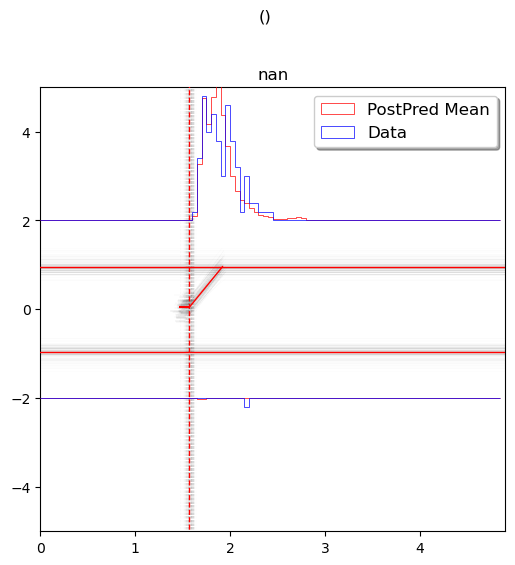

In [21]:
# DDM
hddm.plotting.plot_posterior_predictive(model = hddmnn_model_ddm,
                                        columns = 1,
                                        groupby = ['subj_idx'],
                                        figsize = (6, 6),
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = False,
                                        **{'alpha': 0.01,
                                        'ylim': 5,
                                        'add_posterior_uncertainty_model': True,
                                        'add_posterior_uncertainty_rts': False,
                                        'add_posterior_mean_rts': True,
                                        'samples': 200})
plt.show()


### 7.2 Comparing DIC’s

In [22]:
hddmnn_model_weibull.dic

-72.59113594055177

In [23]:
hddmnn_model_angle.dic

-65.91662839253743

In [24]:
hddmnn_model_ddm.dic

-60.6746201578776

## Section 8: Real Data!

In [25]:
# Metadata
nmcmc = 1000
burn = 500
model = 'angle'

### 8.1 Load and Pre-process dataset

In [26]:
# Load one of the datasets shipping with HDDM
cav_data = hddm.load_csv(hddm.__path__[0] + '/examples/cavanagh_theta_nn.csv')

In [27]:
cav_data

,subj_idx,stim,rt,response,theta,dbs,conf
0,0,LL,1.210,1.0,0.656275,1,HC
1,0,WL,1.630,1.0,-0.327889,1,LC
2,0,WW,1.030,1.0,-0.480285,1,HC
3,0,WL,2.770,1.0,1.927427,1,LC
4,0,WW,1.140,0.0,-0.213236,1,HC
...,...,...,...,...,...,...,...
3983,13,LL,1.450,0.0,-1.237166,0,HC
3984,13,WL,0.711,1.0,-0.377450,0,LC
3985,13,WL,0.784,1.0,-0.694194,0,LC
3986,13,LL,2.350,0.0,-0.546536,0,HC


### 8.2 Basic Condition Split Model

In [28]:
hddmnn_model_cav = hddm.HDDMnn(cav_data,
                               model = model,
                               informative = False,
                               include = hddm.simulators.model_config[model]['hddm_include'],
                               p_outlier = 0.05,
                               is_group_model = False,
                               depends_on = {'v': 'stim'})

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


**Note: If yhddmnn_modelour cpu run low on computing, the following code may take more time**

In [29]:
%%time
# Sample
hddmnn_model_cav.sample(
    nmcmc,burn = burn,
    dbname='hddm_model_cav1.db', db='pickle'
) 
hddmnn_model_cav.save('hddm_model_cav1')

 [-----------------100%-----------------] 1000 of 1000 complete in 171.6 sechddm sampling elpased time:  171.632 s
CPU times: user 22min 50s, sys: 734 ms, total: 22min 51s
Wall time: 2min 51s


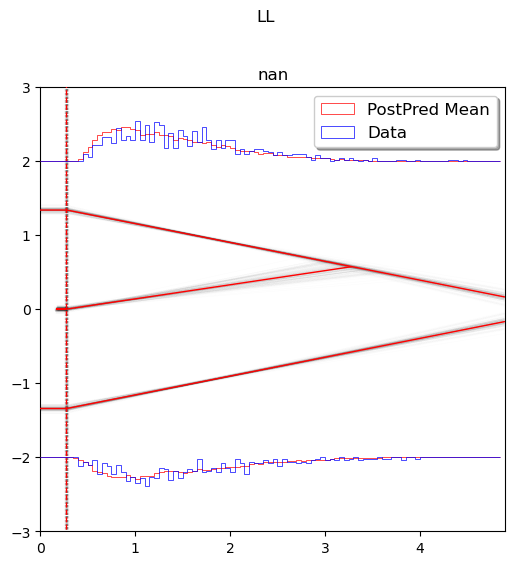

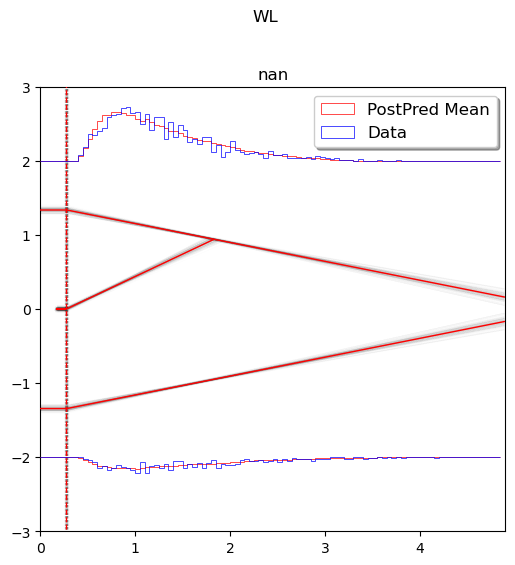

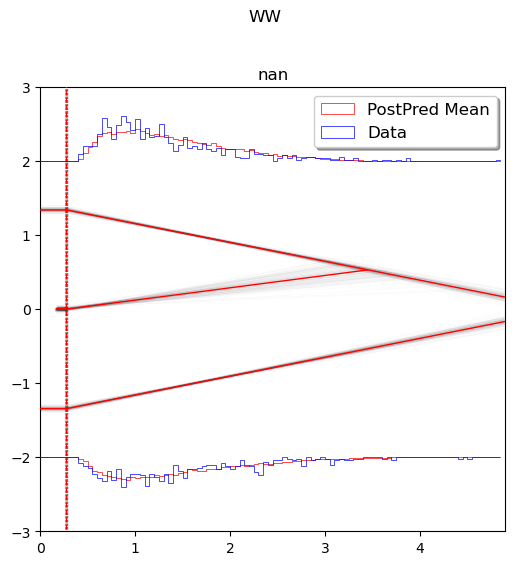

In [31]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_model_cav,
                                        columns = 1,
                                        figsize = (6, 6),
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = False,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'add_posterior_uncertainty_model': True,
                                        'add_posterior_uncertainty_rts': False,
                                        'add_posterior_mean_rts': True,
                                        'samples': 200})
plt.show()

### 8.3 Basic Hierarchical Model

In [32]:
hddmnn_model_cav = hddm.HDDMnn(cav_data,
                               model = model,
                               informative = False,
                               include = hddm.simulators.model_config[model]['hddm_include'],
                               is_group_model = True,
                               p_outlier = 0.05)

Supplied model_config specifies params_std_upper for  z as  None.
Changed to 10


**Note: If yhddmnn_modelour cpu run low on computing, the following code may take more than 50 minutes**

In [33]:
%%time
# Sample
hddmnn_model_cav.sample(
    nmcmc,burn = burn,
    dbname='hddm_model_cav2.db', db='pickle'
) 
hddmnn_model_cav.save('hddm_model_cav2')

 [-----------------100%-----------------] 1001 of 1000 complete in 3094.3 sechddm sampling elpased time:  3094.304 s
CPU times: user 4h 2min 30s, sys: 19min 2s, total: 4h 21min 33s
Wall time: 51min 34s


tracename: 
v
tracename: 
v_subj.0
tracename: 
v_subj.1
tracename: 
v_subj.2
tracename: 
v_subj.3
tracename: 
v_subj.4
tracename: 
v_subj.5
tracename: 
v_subj.6
tracename: 
v_subj.7
tracename: 
v_subj.8
tracename: 
v_subj.9
tracename: 
v_subj.10
tracename: 
v_subj.11
tracename: 
v_subj.12
tracename: 
v_subj.13
tracename: 
a
tracename: 
a_subj.0
tracename: 
a_subj.1
tracename: 
a_subj.2
tracename: 
a_subj.3
tracename: 
a_subj.4
tracename: 
a_subj.5
tracename: 
a_subj.6
tracename: 
a_subj.7
tracename: 
a_subj.8
tracename: 
a_subj.9
tracename: 
a_subj.10
tracename: 
a_subj.11
tracename: 
a_subj.12
tracename: 
a_subj.13
tracename: 
z
tracename: 
z_subj.0
tracename: 
z_subj.1
tracename: 
z_subj.2
tracename: 
z_subj.3
tracename: 
z_subj.4
tracename: 
z_subj.5
tracename: 
z_subj.6
tracename: 
z_subj.7
tracename: 
z_subj.8
tracename: 
z_subj.9
tracename: 
z_subj.10
tracename: 
z_subj.11
tracename: 
z_subj.12
tracename: 
z_subj.13
tracename: 
t
tracename: 
t_subj.0
tracename: 
t_subj.1
tracenam

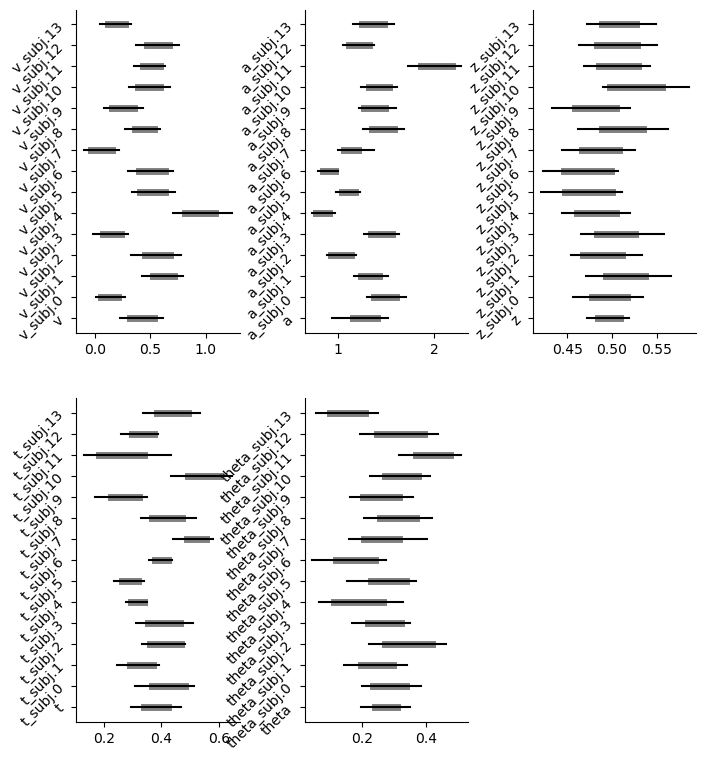

In [34]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.plot_caterpillar(hddm_model = hddmnn_model_cav,
                               figsize = (8, 8),
                               columns = 3)

plt.show()

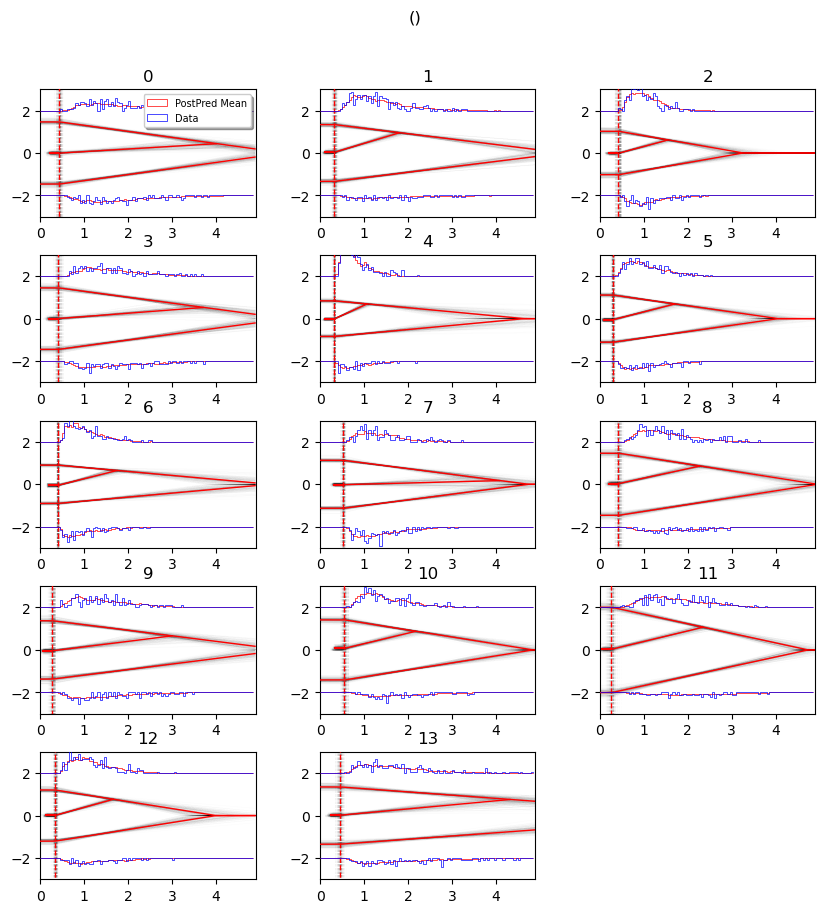

In [36]:
hddm.plotting.plot_posterior_predictive(model = hddmnn_model_cav,
                                        columns = 3,
                                        figsize = (10, 10),
                                        value_range = np.arange(0, 5, 0.1),
                                        plot_func = hddm.plotting._plot_func_model,
                                        parameter_recovery_mode = False,
                                        **{'alpha': 0.01,
                                        'ylim': 3,
                                        'add_posterior_uncertainty_model': True,
                                        'add_posterior_uncertainty_rts': False,
                                        'add_posterior_mean_rts': True,
                                        'samples': 200,
                                        'legend_fontsize': 7,
                                        'subplots_adjust': {'top': 0.9, 'hspace': 0.3, 'wspace': 0.3}})
plt.show()

### Note
This is just an example. The angle model might not be the best choice here, and we are moreover ignoring the supplied conditions.

## Section 9: Accessing the Neural Network Directly

### 9.1 Direct access to batch predictions

In [37]:
model = 'angle'

In [38]:
lan_angle = hddm.network_inspectors.get_torch_mlp(model = model)

Let’s predict some likelihoods !

In [40]:
# Make some random parameter set
parameter_df = hddm.simulators.make_parameter_vectors_nn(model = model,
                                                         param_dict = None,
                                                         n_parameter_vectors = 1)
parameter_df

,v,a,z,t,theta
0,1.765038,1.794252,0.487082,1.700239,0.484929


In [42]:
parameter_matrix = np.tile(np.squeeze(parameter_df.values), (200, 1))
parameter_matrix[1:10]

array([[1.76503791, 1.79425208, 0.48708213, 1.70023885, 0.48492887],
       [1.76503791, 1.79425208, 0.48708213, 1.70023885, 0.48492887],
       [1.76503791, 1.79425208, 0.48708213, 1.70023885, 0.48492887],
       [1.76503791, 1.79425208, 0.48708213, 1.70023885, 0.48492887],
       [1.76503791, 1.79425208, 0.48708213, 1.70023885, 0.48492887],
       [1.76503791, 1.79425208, 0.48708213, 1.70023885, 0.48492887],
       [1.76503791, 1.79425208, 0.48708213, 1.70023885, 0.48492887],
       [1.76503791, 1.79425208, 0.48708213, 1.70023885, 0.48492887],
       [1.76503791, 1.79425208, 0.48708213, 1.70023885, 0.48492887]])

In [43]:
# Initialize network input
network_input = np.zeros((parameter_matrix.shape[0], parameter_matrix.shape[1] + 2)) # Note the + 2 on the right --> we append the parameter vectors with reaction times (+1 columns) and choices (+1 columns)
network_input

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
# Add reaction times
network_input[:, -2] = np.linspace(0, 3, parameter_matrix.shape[0])
network_input

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.01507538,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03015075,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 2.96984925,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 2.98492462,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 3.        ,
        0.        ]])

In [45]:
# Add choices
network_input[:, -1] = np.repeat(np.random.choice([-1, 1]), parameter_matrix.shape[0])
network_input

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.01507538, -1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.03015075, -1.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         2.96984925, -1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         2.98492462, -1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         3.        , -1.        ]])

In [46]:
# Convert to float
network_input = network_input.astype(np.float32)
# Show example output
print(lan_angle(network_input)[:10]) # printing the first 10 outputs
print(lan_angle(network_input).shape) # original shape of output

[[ 4.2394323 ]
 [ 1.557178  ]
 [ 0.6721666 ]
 [ 0.03607679]
 [-0.5329498 ]
 [-0.98186684]
 [-1.3941536 ]
 [-1.822811  ]
 [-2.2679203 ]
 [-2.7137465 ]]
(200, 1)


In [47]:
network_input[:,0:5] = parameter_matrix
network_input

array([[ 1.7650379 ,  1.794252  ,  0.48708212, ...,  0.48492888,
         0.        , -1.        ],
       [ 1.7650379 ,  1.794252  ,  0.48708212, ...,  0.48492888,
         0.01507538, -1.        ],
       [ 1.7650379 ,  1.794252  ,  0.48708212, ...,  0.48492888,
         0.03015075, -1.        ],
       ...,
       [ 1.7650379 ,  1.794252  ,  0.48708212, ...,  0.48492888,
         2.9698493 , -1.        ],
       [ 1.7650379 ,  1.794252  ,  0.48708212, ...,  0.48492888,
         2.9849246 , -1.        ],
       [ 1.7650379 ,  1.794252  ,  0.48708212, ...,  0.48492888,
         3.        , -1.        ]], dtype=float32)

In [48]:
lan_angle(network_input)[1:10]

array([[-16.11816 ],
       [-16.118153],
       [-16.118147],
       [-16.118141],
       [-16.118135],
       [-16.11813 ],
       [-16.118122],
       [-16.118114],
       [-16.118109]], dtype=float32)

### 9.2 Plotting Utilities

HDDM provides two plotting function to investigate the network outputs directly. The `kde_vs_lan_likelihoods()` plot and the `lan_manifold()` plot.

#### 9.2.1 `kde_vs_lan_likelihoods()`
The `kde_vs_lan_likelihoods()` plot allows you to check the likelihoods produced by a LAN against Kernel Density Estimates (KDEs) from model simulations. You can supply a panda `DataFrame` that holds parameter vectors as rows.

In [49]:
# Make some parameters
parameter_df = hddm.simulators.make_parameter_vectors_nn(model = model,
                                                         param_dict = None,
                                                         n_parameter_vectors = 10)


In [50]:
parameter_df

,v,a,z,t,theta
0,1.921192,1.087603,0.380327,1.581296,0.214836
1,-1.159646,0.549283,0.132156,1.745875,0.089655
2,-2.461376,1.462281,0.708835,0.502632,0.402213
3,-1.541595,0.425952,0.149985,1.210906,1.182250
4,-0.757282,1.520276,0.253395,1.607990,1.072146
5,-2.670672,0.449680,0.611861,1.468969,0.762608
6,-2.402587,1.110695,0.896728,0.520005,0.889179
7,-1.779473,2.438860,0.566189,0.514629,0.504035
8,-2.857393,2.919298,0.131488,0.974889,0.828136
9,-0.832477,0.907594,0.236661,0.451307,0.708738


1 of 10
2 of 10
3 of 10
4 of 10
5 of 10
6 of 10
7 of 10
8 of 10
9 of 10
10 of 10


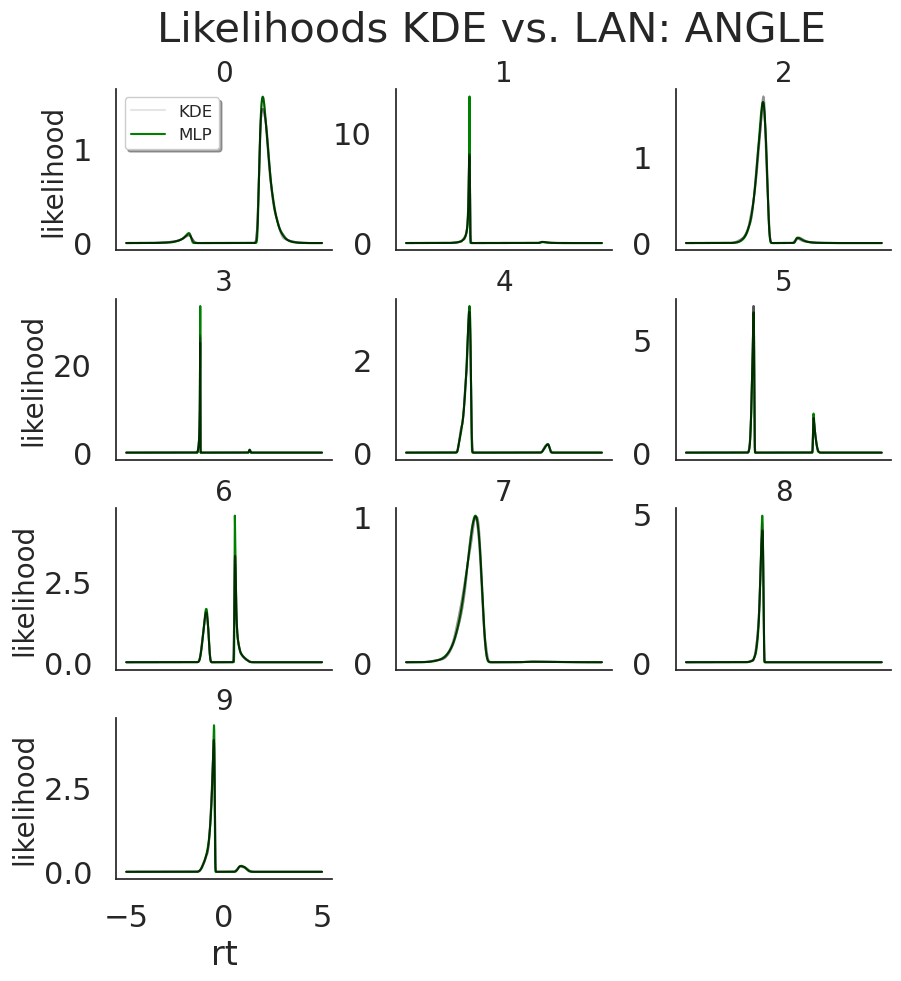

In [51]:
hddm.network_inspectors.kde_vs_lan_likelihoods(parameter_df = parameter_df,
                                               model = model,
                                               cols = 3,
                                               n_samples = 2000,
                                               n_reps = 10,
                                               show = True)

#### 9.2.2 `lan_manifold()`

In [52]:
# Make some parameters
parameter_df = hddm.simulators.make_parameter_vectors_nn(model = model,
                                                         param_dict = None,
                                                         n_parameter_vectors = 1)


In [53]:
parameter_df

,v,a,z,t,theta
0,1.589794,1.073884,0.841459,1.64844,-0.074038


Using only the first row of the supplied parameter array !


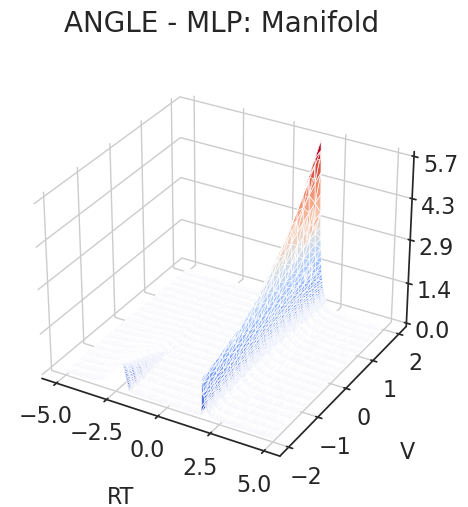

In [54]:
# Now plotting
hddm.network_inspectors.lan_manifold(parameter_df = parameter_df,
                                     vary_dict = {'v': np.linspace(-2, 2, 20)},
                                     model = model,
                                     n_rt_steps = 300,
                                     fig_scale = 1.0,
                                     max_rt = 5,
                                     save = True,
                                     show = True)
